# ANOVA - Analysis of Variance
 #### Read indepth here :- <a href="https://www.analyticsvidhya.com/blog/2018/01/anova-analysis-of-variance/">What is ANOVA? </a>

## 1. One way Anova 

In [1]:
import warnings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.formula.api import ols

warnings.simplefilter(action='ignore', category=FutureWarning) 
np.random.seed(0)

In [2]:
# functions for plotting the box plots with means and the KDE plot
def plot_one_way_anova(data, title):
    # Perform one-way ANOVA
    model = ols('value ~ group', data=data).fit()
    anova_result = sm.stats.anova_lm(model)
    
    # Print ANOVA table and p-value
    print(title)
    print(anova_result)
    print(f"\nP-value: {anova_result['PR(>F)'][0]:.3f}")
    
    # Visualize one-way ANOVA results
    fig, axes = plt.subplots(1, 2, figsize=(12, 6))
    
    sns.boxplot(x='group', y='value', data=data, palette='Set2', ax=axes[0])
    add_mean_lines(axes[0], data, 'group', 'value')
    axes[0].set_title(f'{title}: Boxplot')
    
    for group in data['group'].unique():
        sns.kdeplot(data[data['group'] == group]['value'], label=group, ax=axes[1])
    axes[1].set_title(f'{title}: KDE Plot')
    
    plt.tight_layout()
    plt.show()

def add_mean_lines(ax, data, group_col, value_col):
    means = data.groupby(group_col)[value_col].mean()
    positions = np.arange(len(means))
    ax.hlines(means.values, positions - 0.4, positions + 0.4, color='blue', zorder=3,linestyle="--")
    for i, mean in enumerate(means):
        ax.text(positions[i], mean, f'mean={mean:.2f}', ha='center', va='bottom', fontsize=10, color='blue')

One-way ANOVA Scenario 1: Reject the null hypothesis
            df       sum_sq     mean_sq          F    PR(>F)
group      2.0   624.705904  312.352952  12.586992  0.000016
Residual  87.0  2158.951655   24.815536        NaN       NaN

P-value: 0.000


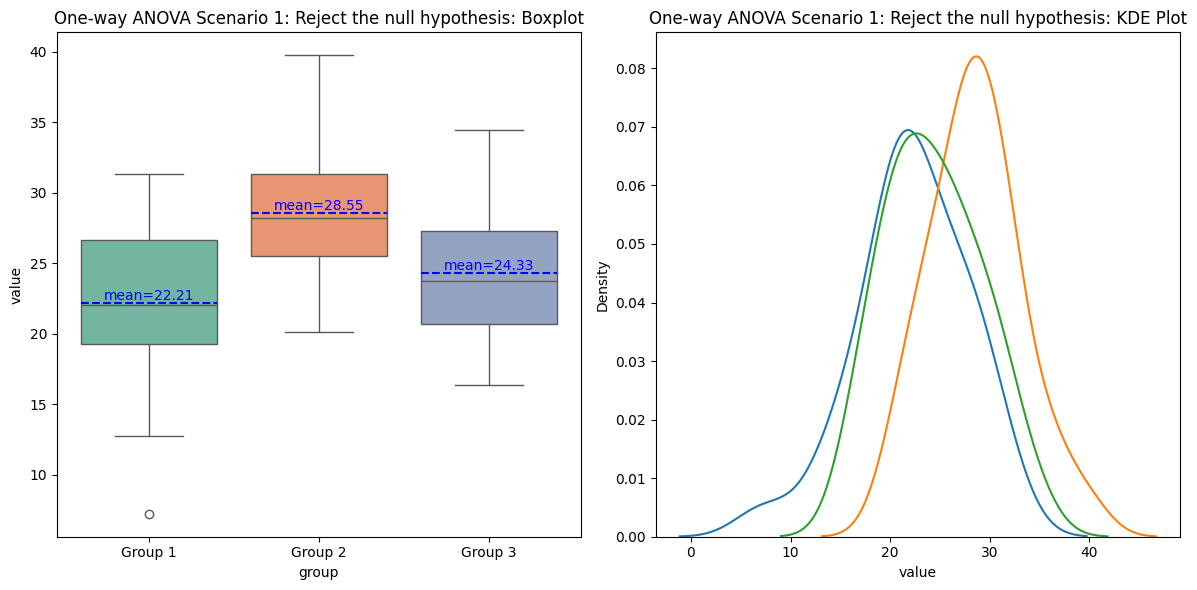

In [3]:
# One-way ANOVA Scenario 1: Reject the null hypothesis
group1_reject = np.random.normal(loc=20, scale=5, size=30)
group2_reject = np.random.normal(loc=30, scale=5, size=30)
group3_reject = np.random.normal(loc=25, scale=5, size=30)

data_one_way_reject = pd.DataFrame({
    'value': np.concatenate([group1_reject, group2_reject, group3_reject]),
    'group': ['Group 1']*30 + ['Group 2']*30 + ['Group 3']*30
})

plot_one_way_anova(data_one_way_reject, "One-way ANOVA Scenario 1: Reject the null hypothesis")

One-way ANOVA Scenario 2: Fail to reject the null hypothesis
            df       sum_sq    mean_sq         F    PR(>F)
group      2.0   180.196233  90.098116  3.895057  0.023983
Residual  87.0  2012.431521  23.131397       NaN       NaN

P-value: 0.024


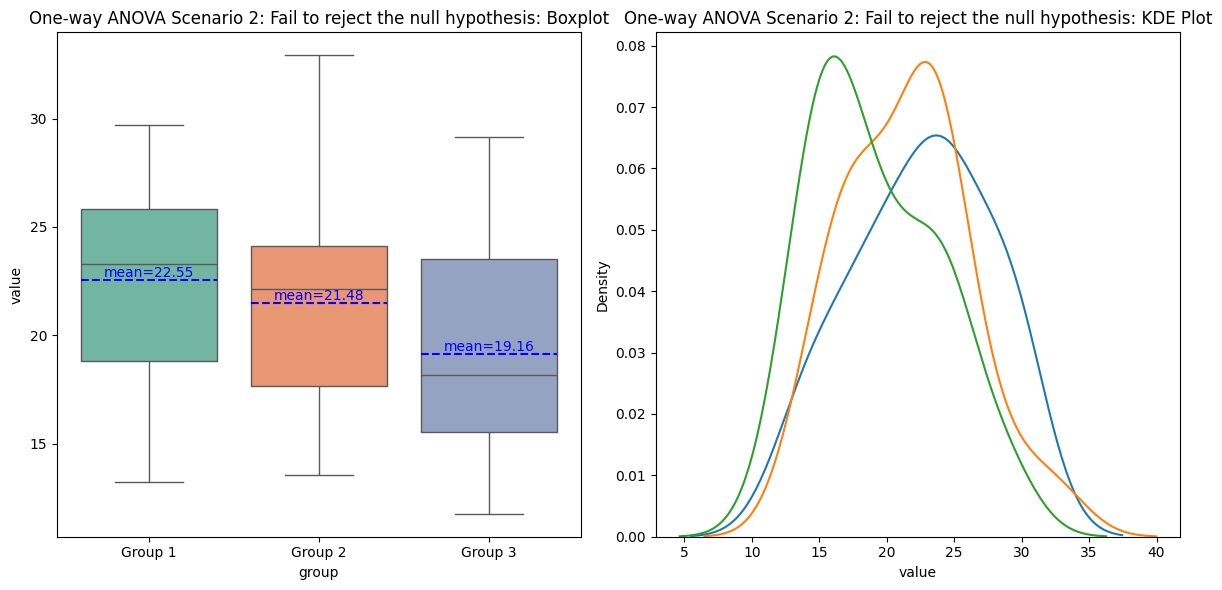

In [4]:
# One-way ANOVA Scenario 2: Fail to reject the null hypothesis
group1_fail = np.random.normal(loc=20, scale=5, size=30)
group2_fail = np.random.normal(loc=21, scale=5, size=30)
group3_fail = np.random.normal(loc=19.5, scale=5, size=30)

data_one_way_fail = pd.DataFrame({
    'value': np.concatenate([group1_fail, group2_fail, group3_fail]),
    'group': ['Group 1']*30 + ['Group 2']*30 + ['Group 3']*30
})

plot_one_way_anova(data_one_way_fail, "One-way ANOVA Scenario 2: Fail to reject the null hypothesis")

### Criteria for Rejection of \( H<sub>0</sub> \):

1. **One-way ANOVA Scenario 1 (Reject \( H<sub>0</sub> \))**:
   - **Null Hypothesis (H<sub>0</sub>)**: There is no difference in means between the groups.
   - **Alternative Hypothesis (H<sub>a</sub>)**: At least one group mean is different from the others.
   - **Criteria for Rejection**: 
     - If the p-value from the ANOVA test is less than the significance level **&alpha;** chosen (commonly 0.05), then we reject the null hypothesis \( H<sub>0</sub> \).
   - **Interpretation**: The data provides sufficient evidence to conclude that there is a statistically significant difference between the means of at least two groups.

2. **One-way ANOVA Scenario 2 (Fail to Reject \( H<sub>0</sub> \))**:
   - **Null Hypothesis (H<sub>0</sub>)**: There is no difference in means between the groups.
   - **Alternative Hypothesis (H<sub>a</sub>)**: At least one group mean is different from the others.
   - **Criteria for Rejection**: 
     - If the p-value from the ANOVA test is greater than or equal to **&alpha;**, then we fail to reject the null hypothesis \( H<sub>0</sub> \).
   - **Interpretation**: The data does not provide sufficient evidence to conclude that there is a statistically significant difference between the means of the groups.

### Summary:

- **Rejecting \( H<sub>0</sub> \)**: Implies strong evidence that there is a significant difference between groups.
- **Failing to Reject \( H<sub>0</sub> \)**: Implies that the observed differences in group means could likely be due to random sampling variability.

In the provided examples:

- **Scenario 1**: We reject \( H<sub>0</sub> \) because the ANOVA test provides a small p-value (typically less than 0.05), indicating significant differences between group means.
- **Scenario 2**: We fail to reject \( H<sub>0</sub> \) because the ANOVA test provides a p-value greater than or equal to 0.05, indicating no significant differences between group means.
